In [2]:
import json
from collections import Counter
import numpy as np
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

In [2]:
# FAIR1M 8-shot
train_json = '/home/barseghyan/Projects/mae/annotations/few_shot_8_fair1m_train_thresh_0.3_patch_16.json'
val_json = '/home/barseghyan/Projects/mae/annotations/few_shot_8_fair1m_val_thresh_0.3_patch_16.json'
n_class = 5
name = 'FAIR1M 8-shot'

In [5]:
# Cityscapes few
train_json = '/home/hkhachatrian/mae/annotations/cs4pc_256_train.npy' # cityscapes, one city only
val_json = '/home/hkhachatrian/mae/annotations/cs4pc_256_val.npy' # cityscapes, one city only
n_class = 35
name = 'Cityscapes 72'

In [58]:
# vis_drone
train_json = '/home/hkhachatrian/mae/annotations/few_shot_visdrone_vis_drone_train_inter_internearestexact_patch_16.npy'
val_json = '/home/hkhachatrian/mae/annotations/few_shot_visdrone_val_vis_drone_val_inter_internearestexact_patch_16.npy'
n_class = 11
name = 'VisDrone 8-shot'

In [74]:
# vis_drone tiled 200
train_json = '/home/hkhachatrian/mae/annotations/vis_drone_200_train_patch_16.npy'
val_json = '/home/hkhachatrian/mae/annotations/vis_drone_200_val_patch_16.npy'
n_class = 11
name = 'VisDrone 8-shot (tiled)'

In [6]:
%%time
train = np.load(train_json, allow_pickle=True).item()

CPU times: user 71.2 ms, sys: 198 ms, total: 269 ms
Wall time: 726 ms


In [7]:
%%time
val = np.load(val_json, allow_pickle=True).item()

CPU times: user 126 ms, sys: 32.1 ms, total: 158 ms
Wall time: 562 ms


In [8]:
val['images'][0]['file_name'], train['images'][0]['file_name']

('/mnt/lwll/lwll-coral/hrant/cs4pc_256/val/munster_000097_000019_leftImg8bit.256_0_0.png',
 '/mnt/lwll/lwll-coral/hrant/cs4pc_256/train/krefeld_000000_011655_leftImg8bit.256_0_0.png')

In [9]:
len(train['images']), len(val['images'])

(2304, 960)

In [10]:
def get_stats(dataset):
    stats_mask = Counter()
    stats_patch_labels = Counter()
    for image in tqdm(dataset['images']):
        mask = np.array(image['black_image'])
        patch_labels = np.array(image['patch_labels'])
        for cl in range(0, n_class):
            stats_mask[cl] += np.sum(mask==cl)
            stats_patch_labels[cl] += np.sum(patch_labels==cl)
    
    return stats_mask, stats_patch_labels


In [11]:
val['images'][0].keys()

dict_keys(['file_name', 'height', 'width', 'id', 'black_image', 'patch_labels'])

In [12]:
train_mask_stats, train_patch_stats = get_stats(train) 

  0%|          | 0/2304 [00:00<?, ?it/s]

In [13]:
val_mask_stats, val_patch_stats = get_stats(val) 

  0%|          | 0/960 [00:00<?, ?it/s]

In [14]:
train_mask_stats.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [15]:
dct = {key:1/val if val != 0 else val for key, val in train_mask_stats.items()}

In [16]:
dct

{0: 0.00010826025765941322,
 1: 1.46628941972476e-07,
 2: 5.623183711661134e-07,
 3: 4.390494053514854e-07,
 4: 4.902028067051901e-07,
 5: 3.5889245787499774e-06,
 6: 3.9031899600586573e-07,
 7: 2.0670389514060227e-08,
 8: 1.0721187478725144e-07,
 9: 5.406106738171438e-06,
 10: 3.143161580507369e-06,
 11: 3.2035611298088736e-08,
 12: 1.244694489737494e-06,
 13: 1.0830211524861293e-06,
 14: 7.1369946115690686e-06,
 15: 9.49782167459893e-07,
 16: 0,
 17: 6.123679964237709e-07,
 18: 0.0001238696890870804,
 19: 4.38454185922113e-06,
 20: 1.2408764558583018e-06,
 21: 4.4556241003816465e-08,
 22: 4.0678749339987294e-07,
 23: 1.744925712405183e-07,
 24: 8.736394158147954e-07,
 25: 6.981680071492404e-06,
 26: 1.5191586413313543e-07,
 27: 2.316638094796831e-06,
 28: 3.0256087524809994e-06,
 29: 1.9312102894884223e-05,
 30: 0.00014118311449950587,
 31: 2.906664108802251e-06,
 32: 2.400326444396438e-05,
 33: 1.998569024578402e-06,
 34: 0}

In [29]:
import torch 

indices = torch.randint(low=0, high=34, size=(196,))

In [38]:
weights = torch.tensor([dct[i.item()] for i in indices])
weights

tensor([4.4556e-08, 5.6232e-07, 1.2447e-06, 1.7739e-08, 6.1237e-07, 1.7739e-08,
        2.9067e-06, 9.4978e-07, 7.1370e-06, 4.3905e-07, 1.7739e-08, 9.4978e-07,
        3.2036e-08, 4.4556e-08, 4.4556e-08, 4.3905e-07, 2.0670e-08, 4.9020e-07,
        1.9986e-06, 4.3905e-07, 1.2387e-04, 9.4978e-07, 1.0830e-06, 1.7739e-08,
        2.3166e-06, 1.7739e-08, 3.2036e-08, 4.3845e-06, 1.0721e-07, 5.6232e-07,
        5.6232e-07, 6.9817e-06, 1.9312e-05, 4.3845e-06, 3.1432e-06, 2.9067e-06,
        5.4061e-06, 3.5889e-06, 5.6232e-07, 5.4061e-06, 1.2447e-06, 1.4663e-07,
        5.6232e-07, 8.7364e-07, 3.0256e-06, 2.3166e-06, 4.9020e-07, 1.4663e-07,
        4.9020e-07, 1.2387e-04, 7.1370e-06, 1.4663e-07, 3.0256e-06, 3.5889e-06,
        4.3905e-07, 1.4118e-04, 3.9032e-07, 4.3845e-06, 7.1370e-06, 5.6232e-07,
        6.1237e-07, 1.9986e-06, 1.0721e-07, 6.9817e-06, 1.9312e-05, 3.9032e-07,
        3.9032e-07, 5.4061e-06, 3.1432e-06, 1.2387e-04, 1.2409e-06, 4.3905e-07,
        4.3845e-06, 2.3166e-06, 1.2409e-

In [32]:
np_ind = np.array(indices)

In [34]:
np_ind[dct.keys()]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [31]:
indices[dct]

IndexError: only integers, slices (`:`), ellipsis (`...`), None and long or byte Variables are valid indices (got dict)

In [18]:
with open('preprocessing/labels.txt') as f:
    labels = {
        int(line[22:25].strip()):
        (line[:22].strip().replace("'", ""), 
         int(line[25:].strip()))
        for line in f.readlines()
    }

eval_labels = [i for i in labels if 0 <= labels[i][1] < 255]

eval_label_names = [labels[i][0] for i in labels if 0 <= labels[i][1] < 255]

In [22]:
[1,2,3].reverse()

In [26]:
plot_labels = [v[0] for k,v in labels.items() if k in eval_labels]
plot_labels.reverse()

plot_values =  [v for k,v  in train_patch_stats.items() if k in eval_labels]
plot_values.reverse()

In [32]:
for v in plot_values:
    print(v)

145218
28209
94687
2436
2764
4949
712
2438
67960
7413
17533
3442
433
19814
1300
982
1045
134
1488


In [33]:
sum(plot_values)

402957

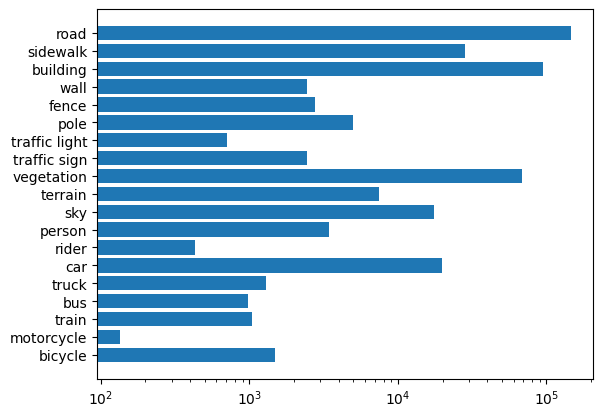

In [28]:
plt.figure()
plt.barh(plot_labels, plot_values)
plt.xscale('log')

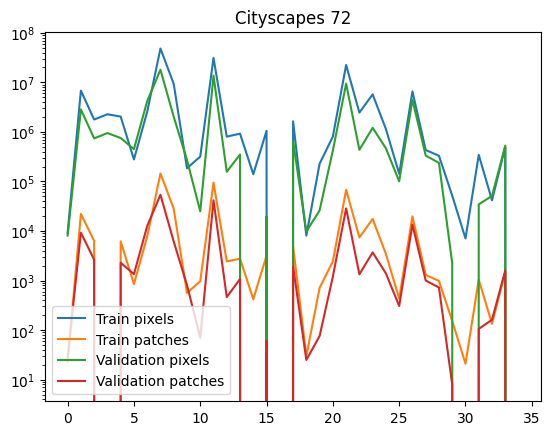

In [17]:
plt.figure()
plt.plot(range(0, n_class), train_mask_stats.values(), label='Train pixels')
plt.plot(range(0, n_class), train_patch_stats.values(), label='Train patches')
plt.plot(range(0, n_class), val_mask_stats.values(), label='Validation pixels')
plt.plot(range(0, n_class), val_patch_stats.values(), label='Validation patches')
plt.yscale('log')
plt.legend()
plt.title(name);

In [12]:
import pandas as pd

In [13]:
d =[{'supercategory': 'void', 'id': 0, 'name': 'unlabeled'},
 {'supercategory': 'void', 'id': 1, 'name': 'ego vehicle'},
 {'supercategory': 'void', 'id': 2, 'name': 'rectification border'},
 {'supercategory': 'void', 'id': 3, 'name': 'out of roi'},
 {'supercategory': 'void', 'id': 4, 'name': 'static'},
 {'supercategory': 'void', 'id': 5, 'name': 'dynamic'},
 {'supercategory': 'void', 'id': 6, 'name': 'ground'},
 {'supercategory': 'flat', 'id': 7, 'name': 'road'},
 {'supercategory': 'flat', 'id': 8, 'name': 'sidewalk'},
 {'supercategory': 'flat', 'id': 9, 'name': 'parking'},
 {'supercategory': 'flat', 'id': 10, 'name': 'rail track'},
 {'supercategory': 'construction', 'id': 11, 'name': 'building'},
 {'supercategory': 'construction', 'id': 12, 'name': 'wall'},
 {'supercategory': 'construction', 'id': 13, 'name': 'fence'},
 {'supercategory': 'construction', 'id': 14, 'name': 'guard rail'},
 {'supercategory': 'construction', 'id': 15, 'name': 'bridge'},
 {'supercategory': 'construction', 'id': 16, 'name': 'tunnel'},
 {'supercategory': 'object', 'id': 17, 'name': 'pole'},
 {'supercategory': 'object', 'id': 18, 'name': 'polegroup'},
 {'supercategory': 'object', 'id': 19, 'name': 'traffic light'},
 {'supercategory': 'object', 'id': 20, 'name': 'traffic sign'},
 {'supercategory': 'nature', 'id': 21, 'name': 'vegetation'},
 {'supercategory': 'nature', 'id': 22, 'name': 'terrain'},
 {'supercategory': 'sky', 'id': 23, 'name': 'sky'},
 {'supercategory': 'human', 'id': 24, 'name': 'person'},
 {'supercategory': 'human', 'id': 25, 'name': 'rider'},
 {'supercategory': 'vehicle', 'id': 26, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 27, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 28, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 29, 'name': 'caravan'},
 {'supercategory': 'vehicle', 'id': 30, 'name': 'trailer'},
 {'supercategory': 'vehicle', 'id': 31, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 32, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 33, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': -1, 'name': 'license plate'}]

In [14]:
names = [x['name'] for x in d]
ids = [x['id'] for x in d]

In [67]:
s = """road          : 0.878018      nan
sidewalk      : 0.016536      nan
building      : 0.782260      nan
wall          : 0.006847      nan
fence         : 0.001296      nan
pole          : 0.007963      nan
traffic light : 0.004580      nan
traffic sign  : 0.050587      nan
vegetation    : 0.756025      nan
terrain       : 0.024827      nan
sky           : 0.794539      nan
person        : 0.201122    0.000000
rider         : 0.072572    0.000000
car           : 0.510931    0.000000
truck         : 0.000000    0.000000
bus           : 0.123684    0.000000
train         : 0.005915    0.000000
motorcycle    : 0.025850    0.000000
bicycle       : 0.124103    0.000000"""

s.split('\n')[0].split()
names_ = []
pred = []
for i in s.split('\n'):
    print(i.split())
    names_.append(i.split(':')[0].strip())
    pred.append(float(i.split(":")[1].strip().split()[0]))

['road', ':', '0.878018', 'nan']
['sidewalk', ':', '0.016536', 'nan']
['building', ':', '0.782260', 'nan']
['wall', ':', '0.006847', 'nan']
['fence', ':', '0.001296', 'nan']
['pole', ':', '0.007963', 'nan']
['traffic', 'light', ':', '0.004580', 'nan']
['traffic', 'sign', ':', '0.050587', 'nan']
['vegetation', ':', '0.756025', 'nan']
['terrain', ':', '0.024827', 'nan']
['sky', ':', '0.794539', 'nan']
['person', ':', '0.201122', '0.000000']
['rider', ':', '0.072572', '0.000000']
['car', ':', '0.510931', '0.000000']
['truck', ':', '0.000000', '0.000000']
['bus', ':', '0.123684', '0.000000']
['train', ':', '0.005915', '0.000000']
['motorcycle', ':', '0.025850', '0.000000']
['bicycle', ':', '0.124103', '0.000000']


In [68]:
names_

['road',
 'sidewalk',
 'building',
 'wall',
 'fence',
 'pole',
 'traffic light',
 'traffic sign',
 'vegetation',
 'terrain',
 'sky',
 'person',
 'rider',
 'car',
 'truck',
 'bus',
 'train',
 'motorcycle',
 'bicycle']

In [69]:
new_col = pd.Series([0]*df.shape[0])

In [70]:
df['preds'] = new_col

In [76]:
new_col = [0]* 
for name, p, i in zip(names_, pred, range(len(names_))):
    new_

[0]


AttributeError: can't set attribute

In [82]:
df['pixels'] = df['pixels'].apply(lambda x: x / 1000000)

In [84]:
x = [1, 2, [1, 2]]
t = tuple(x)

In [89]:
t[2][0] = 1

In [93]:
s = {1, 2, 3, 4, 1, 3, 5}

In [95]:
s |= {7, 8}

In [16]:
t1 = 't11'
t2 = 't11'

t1 is t2

True

In [97]:
s

{1, 2, 3, 4, 5, 7, 8}

In [17]:
df

NameError: name 'df' is not defined

In [18]:
df = pd.DataFrame([names, train_patch_stats.values(), train_mask_stats.values()])
df = df.T
df.columns=['classname', 'patches', 'pixels']
df

,classname,patches,pixels
0,unlabeled,67404,56374293
1,ego vehicle,9120,6819936
2,rectification border,3408,1778352
3,out of roi,0,2277648
4,static,2558,2039972
5,dynamic,340,278635
6,ground,3164,2562007
7,road,59688,48378382
8,sidewalk,11634,9327325
9,parking,227,184976


In [32]:
df = pd.DataFrame([names, train_patch_stats.values(), train_mask_stats.values()])
df = df.T
df.columns=['classname', 'patches', 'pixels']

In [33]:
df

,classname,patches,pixels
0,sky,190129,39093684
1,road,28658,5696372
2,sidewalk,236391,48247970
3,building,45884,9337576
4,vegetation,154313,31143929
5,pole,111236,22429876
6,static,8107,1638940
7,traffic light,10084,2058436
8,bus,1127,231089
9,traffic sign,1623,330770


In [68]:
idx = 16

In [69]:
train['images'][idx]['width'], train['images'][idx]['height']

(1400, 1050)

In [70]:
np.unique(train['images'][idx]['black_image'])

array([ 0.,  4.,  5., 10.])

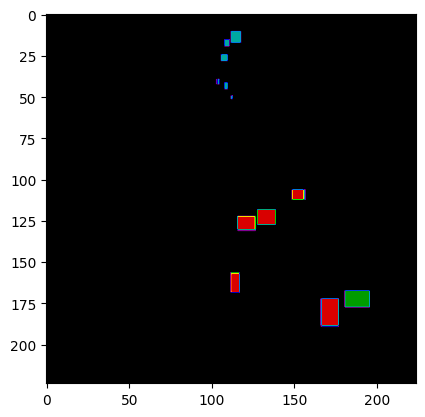

In [71]:
plt.figure()
plt.imshow(cv2.resize(train['images'][idx]['black_image'], (224,224)), vmin=0, vmax=n_class, cmap='nipy_spectral');

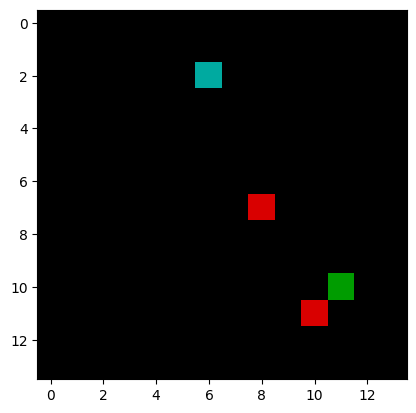

In [72]:
plt.figure()
plt.imshow(cv2.resize(
    train['images'][idx]['black_image'], ((14,14)), interpolation=cv2.INTER_NEAREST_EXACT
          ), vmin=0, vmax=n_class, cmap='nipy_spectral');

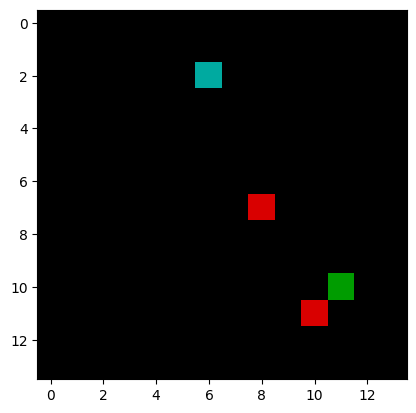

In [73]:
plt.figure()
plt.imshow(np.array(train['images'][idx]['patch_labels']).reshape((14,14)), vmin=0, vmax=n_class, cmap='nipy_spectral');